In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
from keras.preprocessing import image

In [2]:
# Directories for training and test data
train_dir = '/kaggle/input/muffin-vs-chihuahua-image-classification/train'
test_dir = '/kaggle/input/muffin-vs-chihuahua-image-classification/test'

In [3]:
# Setting up ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=40,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True    
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary'     
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary'     
)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


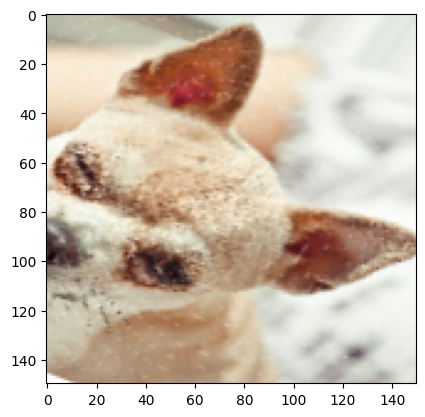

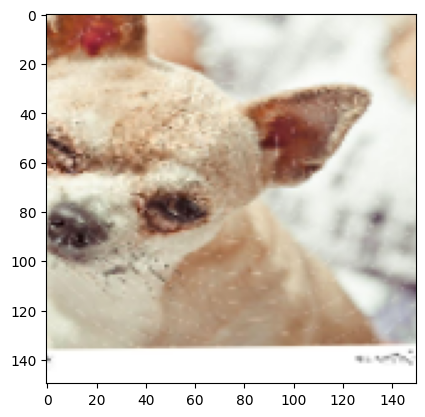

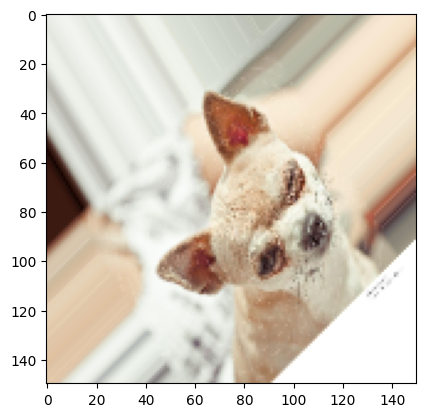

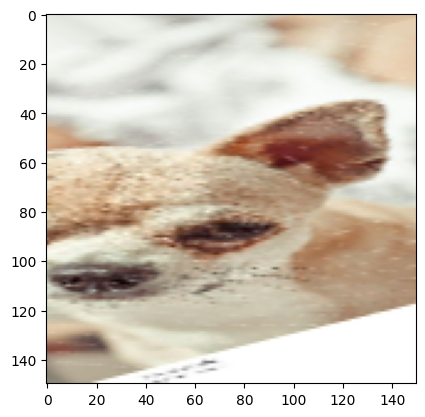

In [4]:
fname = '/kaggle/input/muffin-vs-chihuahua-image-classification/train/chihuahua/img_0_1018.jpg'

# Load an image and resize it
img = image.load_img(fname, target_size=(150, 150))

# Convert the image to a numpy array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.6,
    horizontal_flip=True
)

# Generate and display 4 augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
# Model Definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=148,
    epochs=70,
    validation_data=test_generator,
    validation_steps=37
)

Epoch 1/70
148/148 [==============================] - 129s 859ms/step - loss: 0.6241 - acc: 0.6951 - val_loss: 0.6246 - val_acc: 0.7390
Epoch 2/70
148/148 [==============================] - 103s 693ms/step - loss: 0.4851 - acc: 0.7864 - val_loss: 0.5010 - val_acc: 0.7492
Epoch 3/70
148/148 [==============================] - 103s 693ms/step - loss: 0.4198 - acc: 0.8120 - val_loss: 0.3063 - val_acc: 0.8733
Epoch 4/70
148/148 [==============================] - 102s 688ms/step - loss: 0.3857 - acc: 0.8375 - val_loss: 0.2896 - val_acc: 0.8826
Epoch 5/70
148/148 [==============================] - 103s 692ms/step - loss: 0.3607 - acc: 0.8502 - val_loss: 0.2919 - val_acc: 0.8851
Epoch 6/70
148/148 [==============================] - 102s 688ms/step - loss: 0.3429 - acc: 0.8589 - val_loss: 0.4576 - val_acc: 0.8015
Epoch 7/70
148/148 [==============================] - 102s 687ms/step - loss: 0.3143 - acc: 0.8650 - val_loss: 0.2429 - val_acc: 0.9012
Epoch 8/70
148/148 [============================

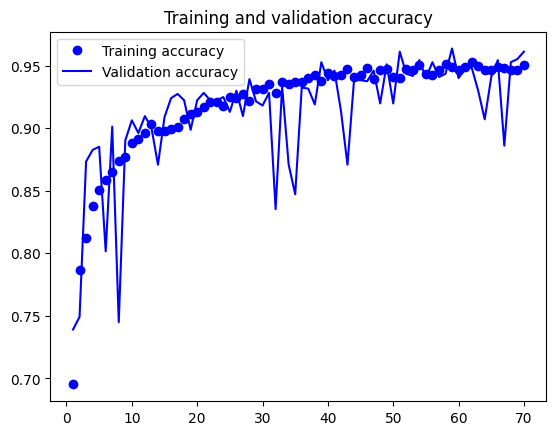

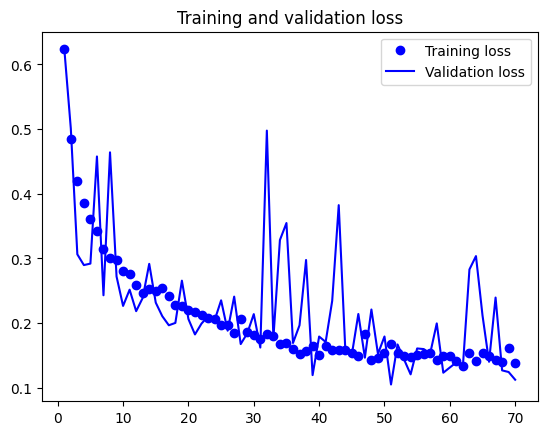

In [7]:
# Plot training and validation accuracy and loss
accuracy_key = 'acc'  # or 'accuracy'
val_accuracy_key = 'val_acc'  # or 'val_accuracy'

acc = history.history[accuracy_key]
val_acc = history.history[val_accuracy_key]
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()